In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


# 1.0 About Dataset

The aim of this notebook is to uncover the factors that lead to employee attrition and make predictions.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [2]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 2.0 Exploratory Data Analysis

Let's remove coulmns with **_std = 0_** first: EmployeeCount = 1, StandardHours = 80

In [5]:
df.select_dtypes(include = ['int64']).std()

Age                            9.135373
DailyRate                    403.509100
DistanceFromHome               8.106864
Education                      1.024165
EmployeeCount                  0.000000
EmployeeNumber               602.024335
EnvironmentSatisfaction        1.093082
HourlyRate                    20.329428
JobInvolvement                 0.711561
JobLevel                       1.106940
JobSatisfaction                1.102846
MonthlyIncome               4707.956783
MonthlyRate                 7117.786044
NumCompaniesWorked             2.498009
PercentSalaryHike              3.659938
PerformanceRating              0.360824
RelationshipSatisfaction       1.081209
StandardHours                  0.000000
StockOptionLevel               0.852077
TotalWorkingYears              7.780782
TrainingTimesLastYear          1.289271
WorkLifeBalance                0.706476
YearsAtCompany                 6.126525
YearsInCurrentRole             3.623137
YearsSinceLastPromotion        3.222430


In [6]:
df.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [8]:
cat_columns = df.select_dtypes(include = ['object'])
cat_columns.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


## 2.1 Distribution of Categorical Variables

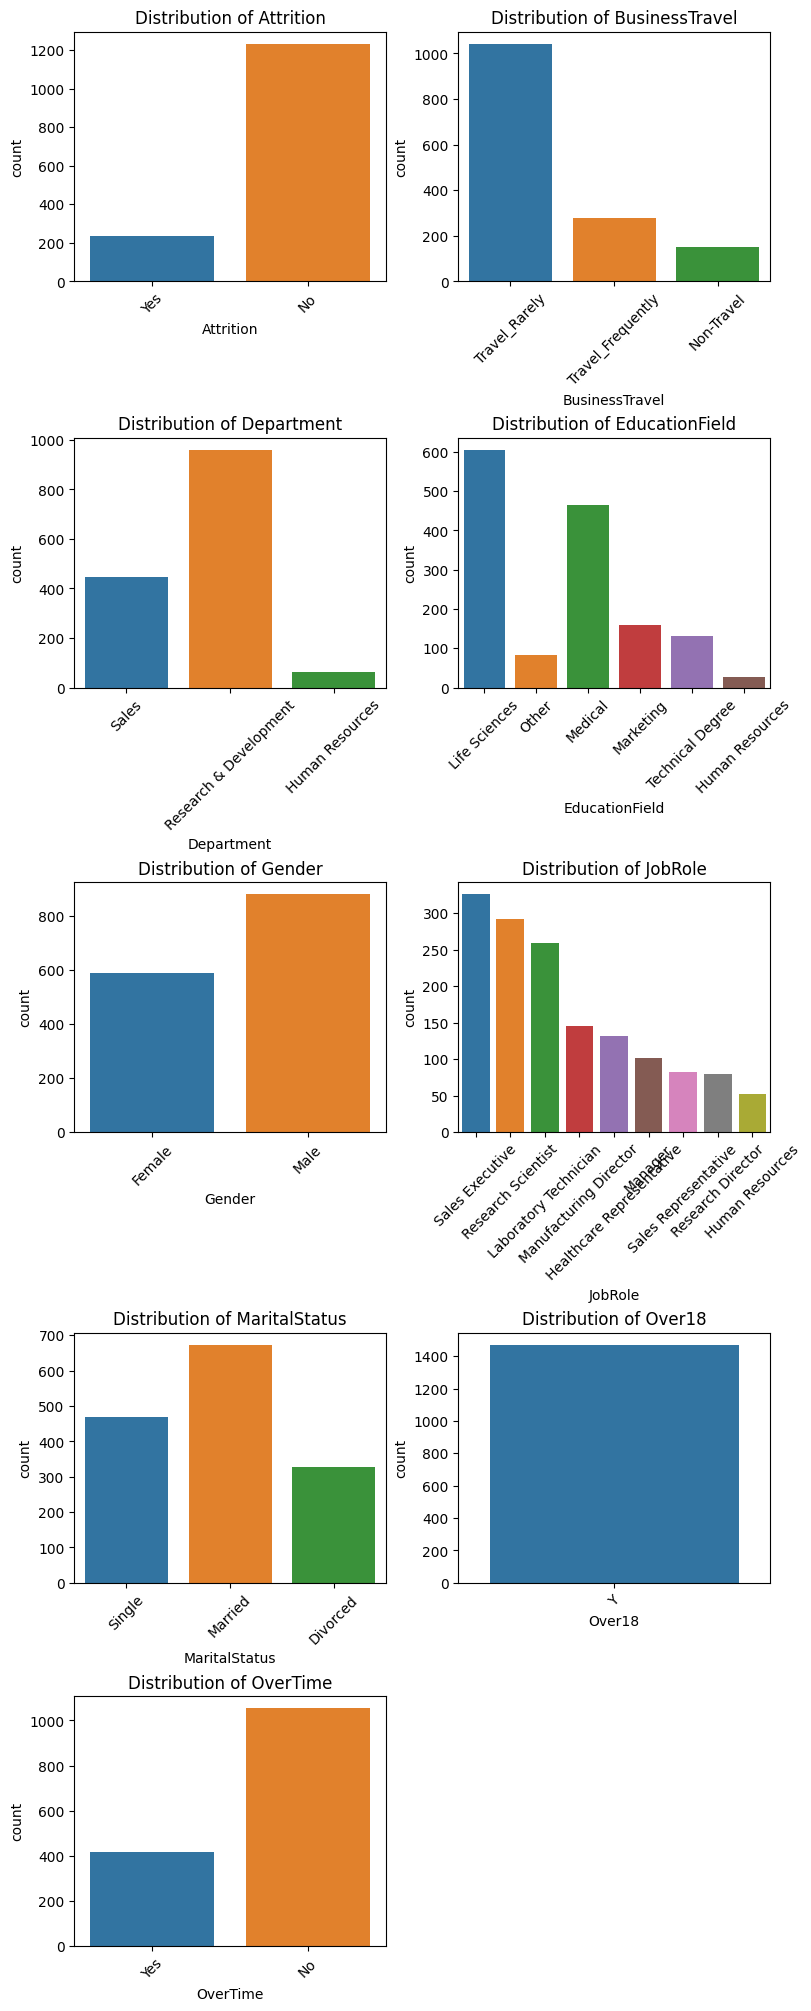

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = len(cat_columns.columns)

# Calculate the number of rows needed for 2 columns
# If n_cols is odd, adding 1 ensures an extra row for the last plot
n_rows = n_cols // 2 + (n_cols % 2)

fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(8, n_rows*4), constrained_layout=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(cat_columns.columns):
    sns.countplot(x=column, data=cat_columns, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused axes if the number of plots is odd
if n_cols % 2:
    axes[-1].set_visible(False)

plt.show()

In [10]:
# drop coolumn Over18 (value = Y)
df.drop('Over18', axis = 1, inplace = True)
len(df.columns)

32

## 2.2 Distribution of Numeric Values

<Figure size 640x480 with 0 Axes>

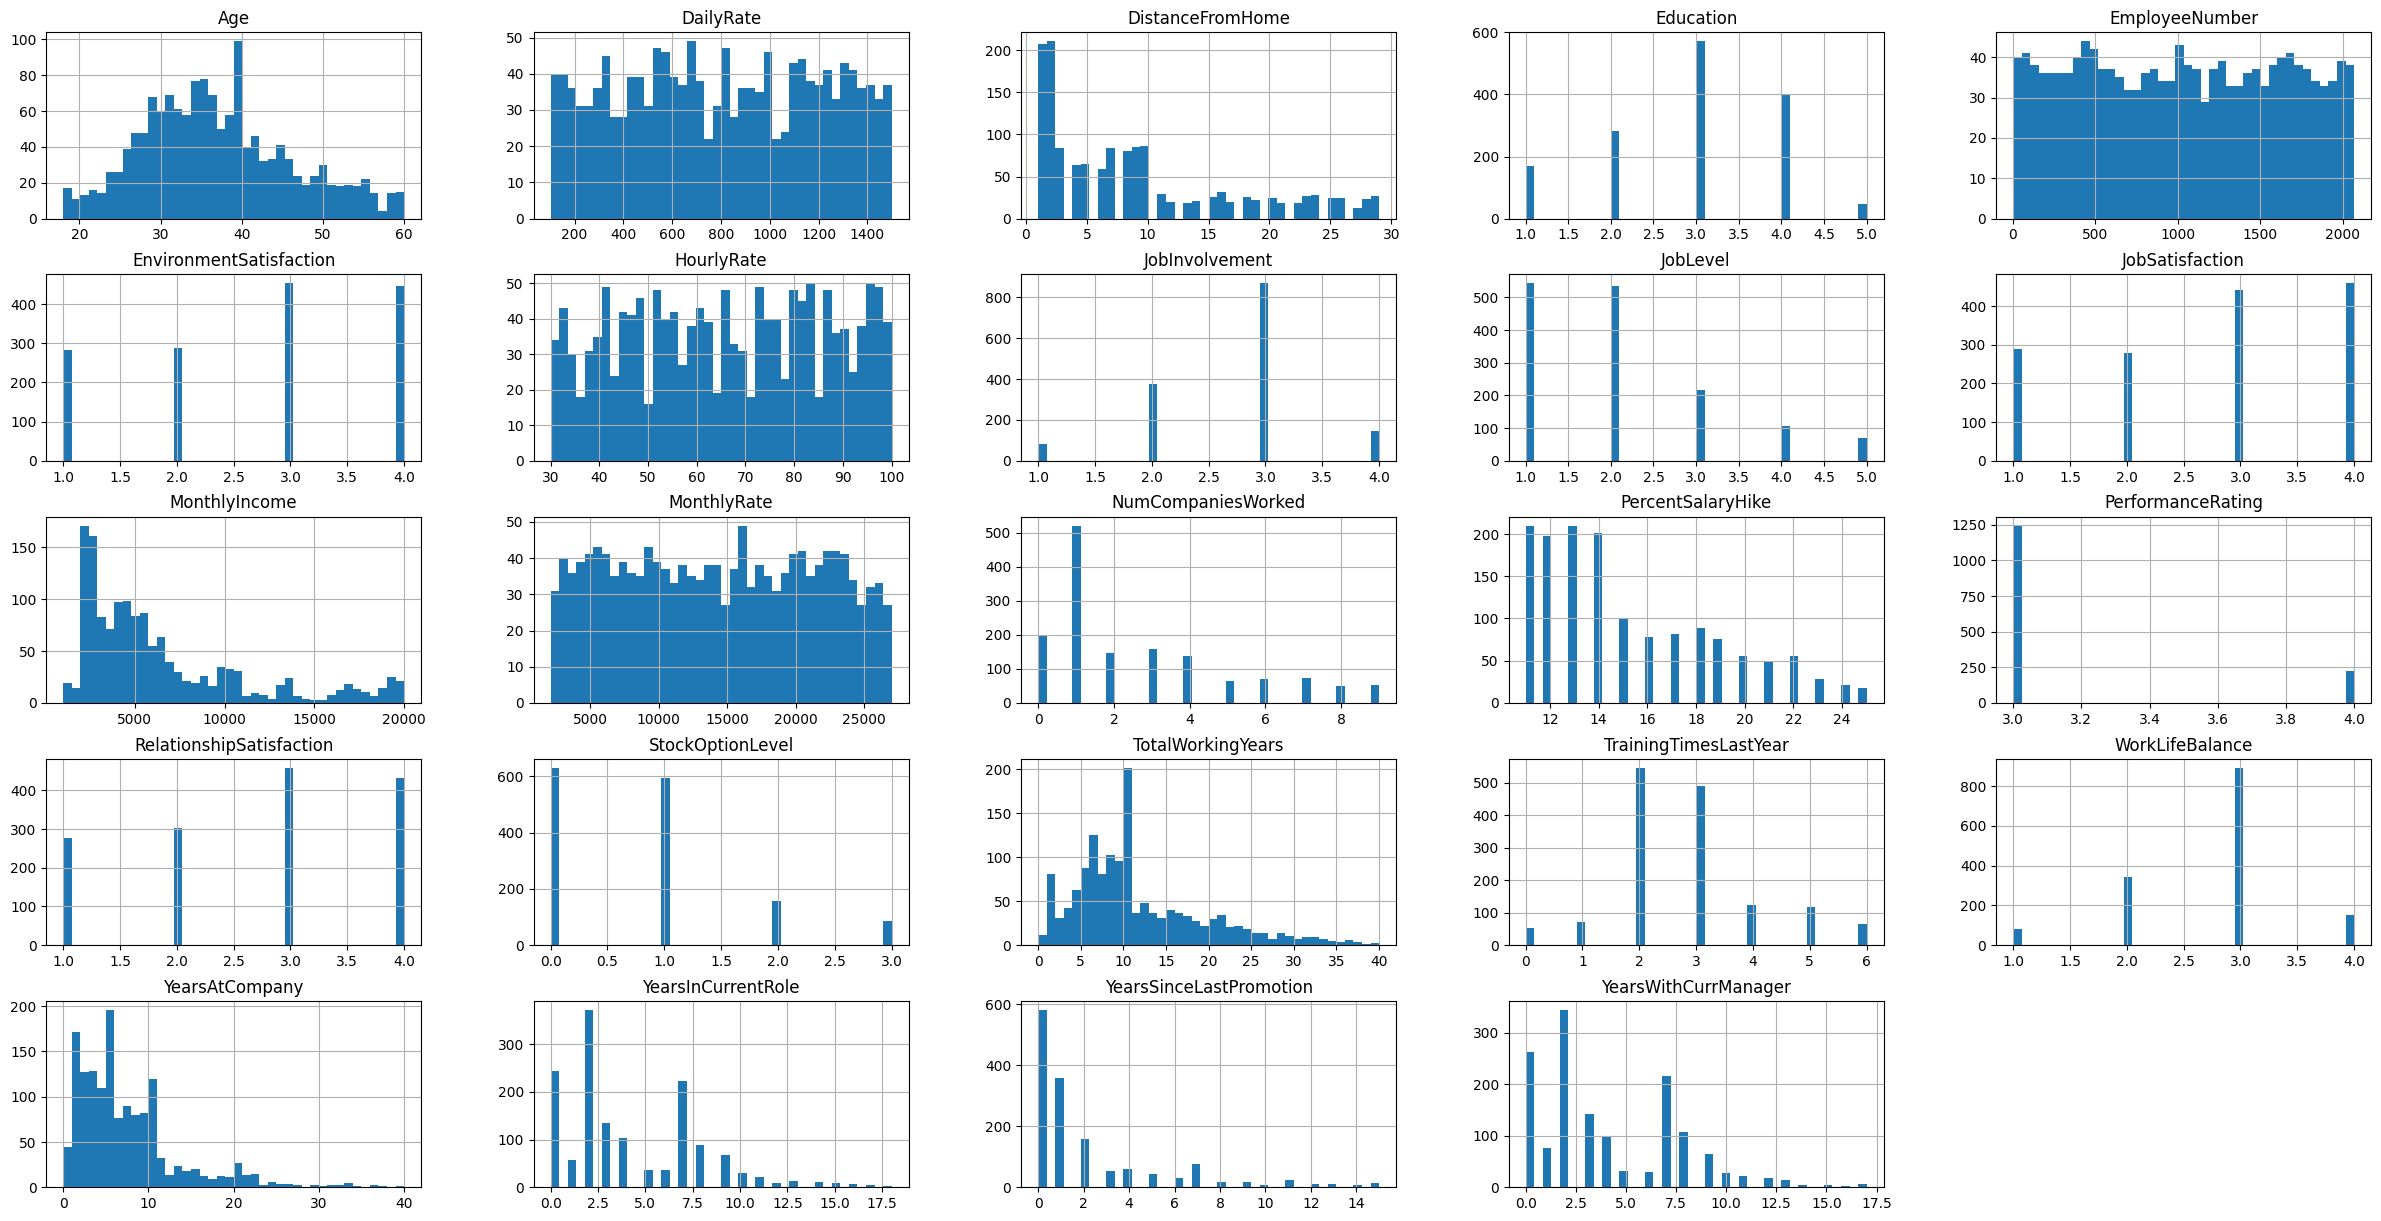

In [11]:
# distribution of numeric columns
plt.figure()
df.hist(bins=40, figsize=[30,15])
plt.show()

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df.drop('EmployeeNumber', axis = 1, inplace = True)

Insights:

- The predominant age group of employees lies between 25 to 40 years. Beyond this age range, there's a notable decline in employee numbers.
- A significant portion of employees reside within 10 miles of the company, indicating a preference for shorter commutes.
- Employees holding Bachelor's and Master's degrees constitute the majority (67%).
- Approximately 60% of employees express satisfaction with their work environment.
- High job involvement is evident among 75% of the workforce.
- Job satisfaction is reported by 60% of employees.
- About one-third of the workforce has experience working with only one company.
- Salary hikes ranging from 11% to 14% are received by 53% of employees.
- The performance rating for 83% of employees is 3.0 (excellent), with the highest observed rating being 4.0 (outstanding), demonstrating a high level of performance across the board.
- Stock option levels for 80% of employees are at 0.0 and 1.0, with the maximum level reported being 3.0.
- The most common tenure range is between 5 to 10 years.
- Two-thirds of the employees received training 2 or 3 times in the last year.
- Work-life balance is rated as 3.0 (better) by 60% of employees, with the highest rating being 4.0 (best), reflecting a positive balance between work and personal life.
- The majority of employees have tenures of 11 years or less within the company.
- A downward trend in employee numbers is observed as years since the last promotion increase, with 73% receiving a promotion within the last two years.
- Similar patterns are noted in the distribution of years in the current role and years with the current manager, pointing to parallel career progression and management experience.

## 2.3 Relationship Between Categorical Variables & Target

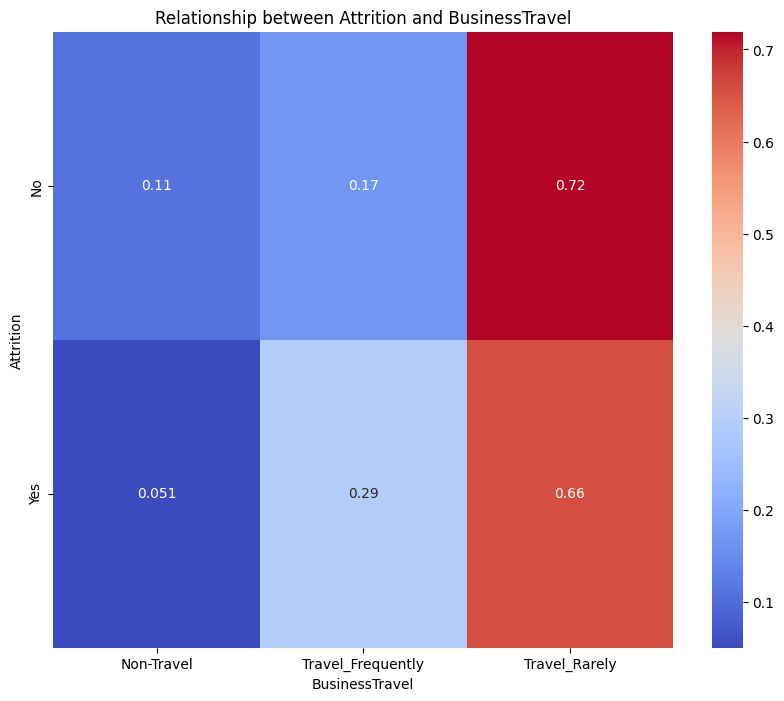

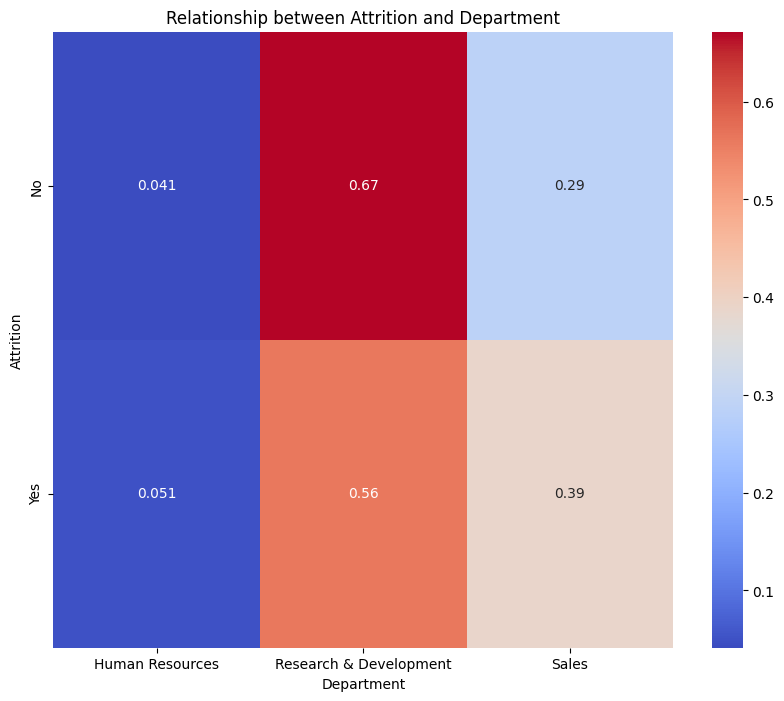

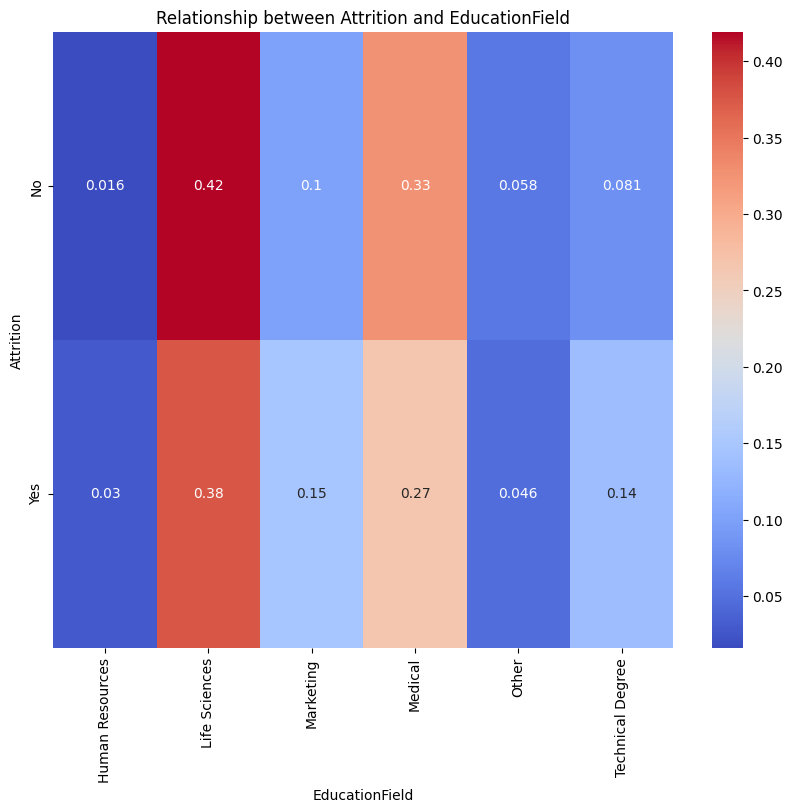

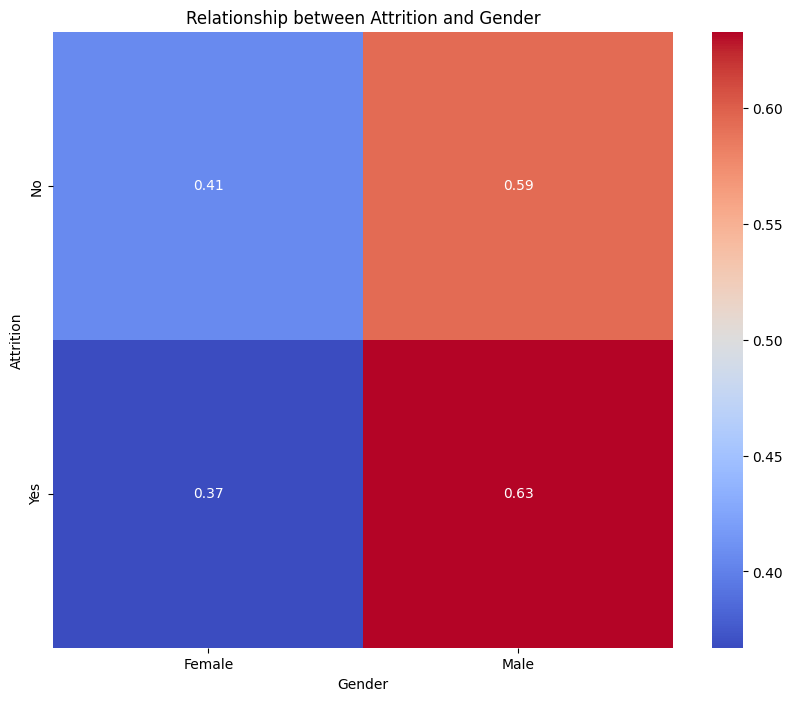

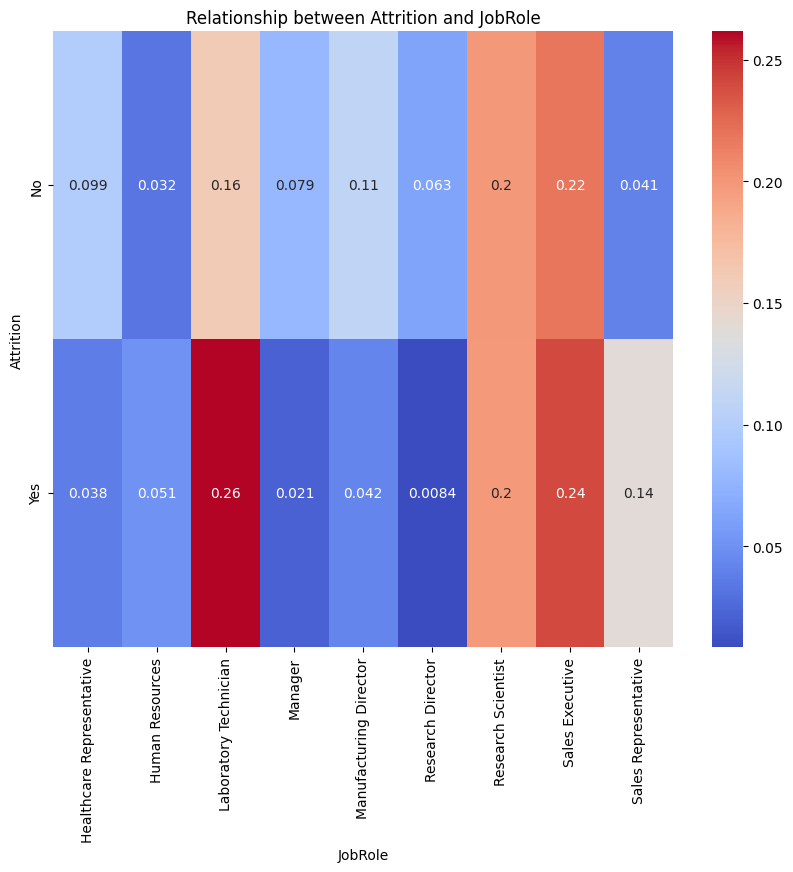

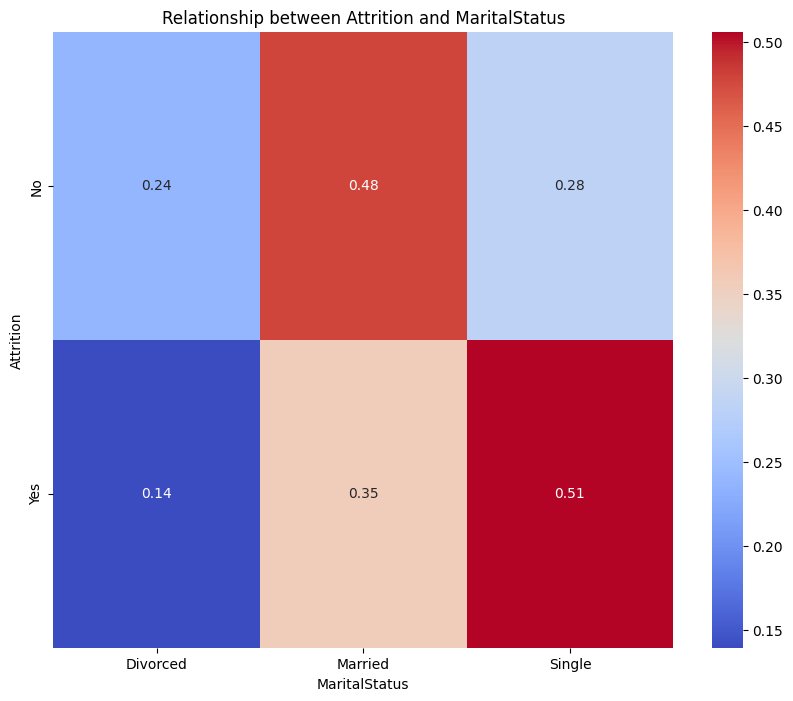

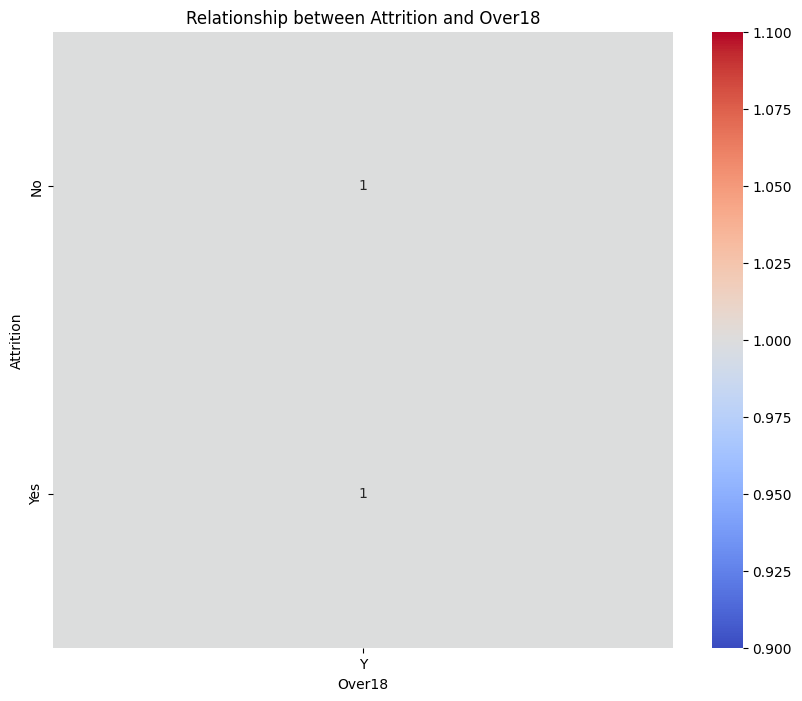

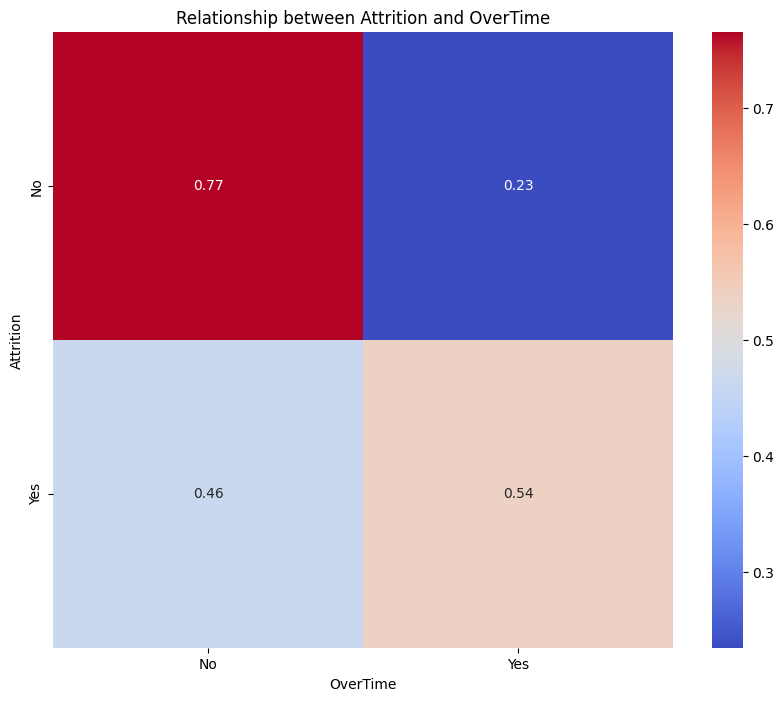

In [14]:
# heatmap of relationship between categorical variables and target variable: attrition
for column in cat_columns.columns:
    if column != 'Attrition':
        # Create a cross-tabulation table
        ctab = pd.crosstab(cat_columns['Attrition'], cat_columns[column], normalize='index')
        
        # Plot the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(ctab, annot=True, cmap='coolwarm')
        plt.title(f'Relationship between Attrition and {column}')
        plt.ylabel('Attrition')
        plt.xlabel(column)
        plt.show()


Insights:
- 62% of laboratory technicians opt to leave the company.
- There's a noticeable trend where employees engaging in frequent travel show a higher propensity to resign, suggesting that travel demands may impact job satisfaction.
- Departments such as Human Resources and Sales exhibit higher attrition rates
- Among employees with degrees, those holding qualifications in Human Resources, Marketing, and Technical fields exhibit a higher likelihood of leaving.
- Male employees tend to resign at a higher rate compared to their female counterparts.
- Single employees constitute 51% of the total resignations.
- Employees who work overtime are more likely to leave their jobs.

## 2.4 Box Plot of Numeric Values & Target

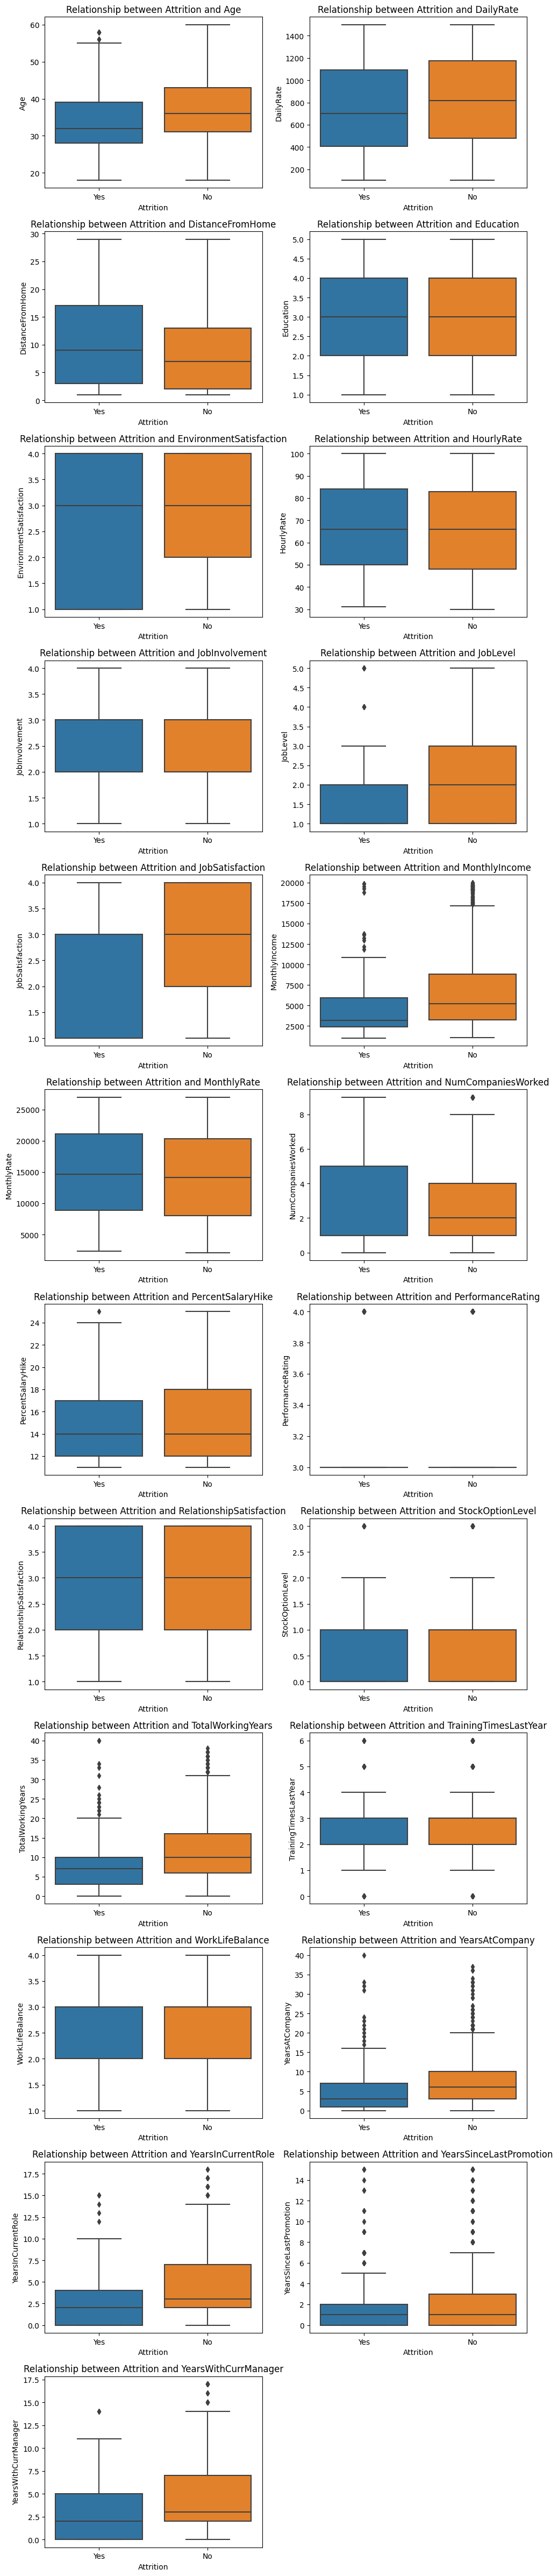

In [15]:
# relationship between numeric values and target
num_columns = df.select_dtypes(include=['int64']).columns
target = 'Attrition'

# Calculate the number of rows needed for the subplot grid
num_rows = len(num_columns) // 2 + len(num_columns) % 2

# Create a figure with subplots arranged in rows and 2 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, num_rows*4))
axes = axes.flatten() 

# Iterate over numeric columns and create a boxplot for each, placing two plots per row
for i, column in enumerate(num_columns):
    sns.boxplot(x=df[target], y=df[column], ax=axes[i])
    axes[i].set_title(f'Relationship between {target} and {column}')

# Hide any unused axes if the number of plots is odd
if len(num_columns) % 2 != 0:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

Insights:
- Several factors appear to contribute to increased attrition rates, including: younger age, lower income, greater distance from home, lower job level, job dissatisfaction, shorter tenure at the company (including fewer years in the current role and with the current manager, which may signal underdeveloped bonds or a lack of advancement opportunities that contribute to leaving).

# 3.0 Checking For Correlation

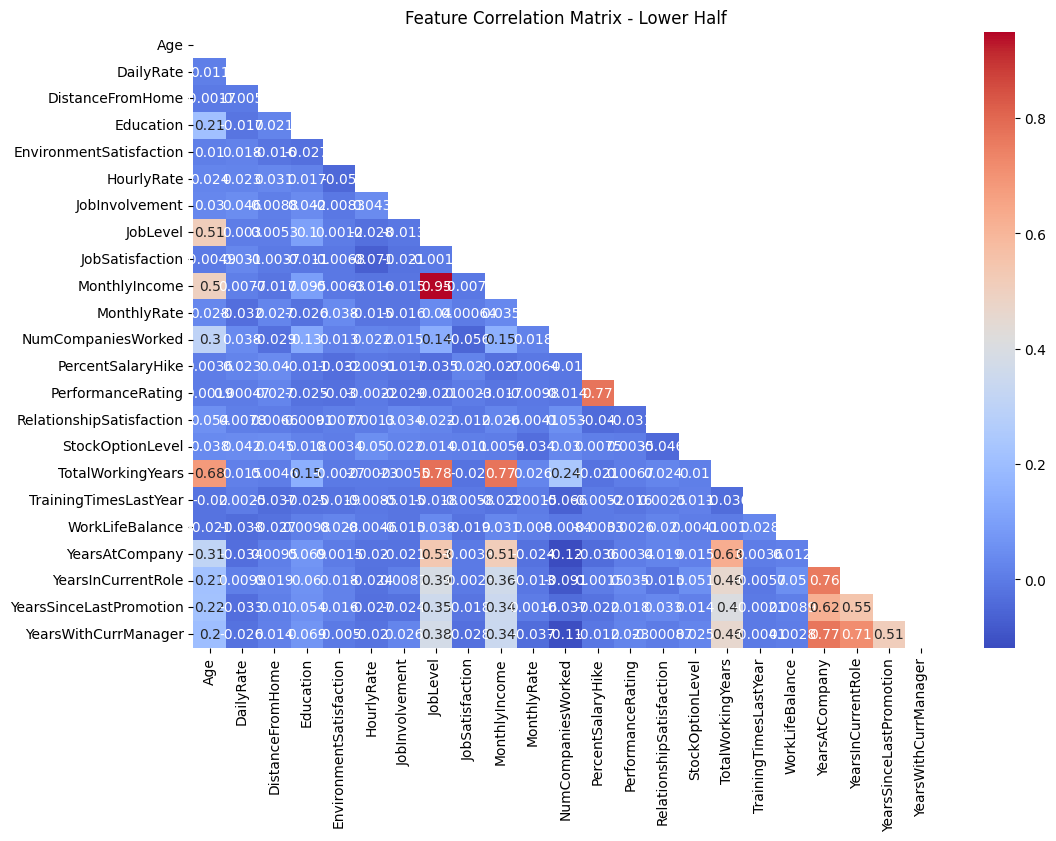

In [16]:
num_col = df.select_dtypes(include=['int64'])
correlation_matrix = num_col.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust the dimensions as needed

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title("Feature Correlation Matrix - Lower Half")
plt.show()

There are high correlation between feature pairs (>= 0.6): {'MonthlyIncome', 'JobLevel'}, {'TotalWorkingYears', 'Age'}, {'PerformanceRating', 'PercentSalaryHike'}, {'TotalWorkingYears', 'JobLevel'}, {'TotalWorkingYears', 'MonthlyIncome'}, {'YearsAtCompany', 'TotalWorkingYears'}, {'YearsAtCompany', 'YearsWithCurrManager'}, {'YearsAtCompany', 'YearsSinceLastPromotion'}, {'YearsAtCompany', 'YearsInCurrentRole'}, {'YearsInCurrentRole', 'YearsWithCurrManager'}

In [17]:
df.drop(['TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome', 'PerformanceRating', 'YearsInCurrentRole'], axis = 1, inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,19479,8,Yes,11,1,0,0,1,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,24907,1,No,23,4,1,3,3,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2396,6,Yes,15,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,23159,1,Yes,11,3,0,3,3,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,16632,9,No,12,4,1,3,3,2,2


# 4.0 Model Building

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,19479,8,Yes,11,1,0,0,1,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,24907,1,No,23,4,1,3,3,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2396,6,Yes,15,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,23159,1,Yes,11,3,0,3,3,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,16632,9,No,12,4,1,3,3,2,2


Encode Categorical Variables

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = df.drop('Attrition', axis=1)  # Features
y = df['Attrition'].map({'Yes': 1, 'No': 0})  # Target variable mapped to binary

# One-hot encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

Address class imblance

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.805668016194332
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       250
           1       0.81      0.80      0.80       244

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494



In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy}\n')
    print(classification_report(y_test, y_pred))
    print('-' * 80)
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# List of models
models = [rf_model, gb_model]

# Train and evaluate each model
for model in models:
    train_and_evaluate(model, X_train, y_train, X_test, y_test)

Model: RandomForestClassifier
Accuracy: 0.9271255060728745

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       250
           1       0.97      0.88      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

--------------------------------------------------------------------------------
Model: GradientBoostingClassifier
Accuracy: 0.9149797570850202

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       250
           1       0.95      0.87      0.91       244

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494

--------------------------------------------------------------------------------


The highest accuracy is 92.7% with Random Forest.